## Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('bestsellers_with_categories.csv')
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Summary Statistics

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
data.shape

(550, 7)

In [6]:
data.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

### 1. The best selling books of the decade

##### Highest Priced books of the decade

In [7]:
best_sold = data[data['Price'] > 16].sort_values(by = ['Price'], ascending = False)
best_sold.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction
151,Hamilton: The Revolution,Lin-Manuel Miranda,4.9,5867,54,2016,Non Fiction
346,The Book of Basketball: The NBA According to T...,Bill Simmons,4.7,858,53,2009,Non Fiction


Text(0.5, 0, 'Book Name')

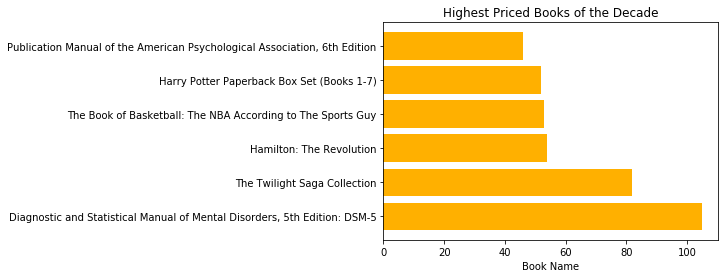

In [8]:
plt.barh(best_sold.head(10)['Name'], best_sold.head(10)['Price'], color = '#FFB000')
plt.title('Highest Priced Books of the Decade')
plt.xlabel('Book Name')

In [9]:
best_sold['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                  10
StrengthsFinder 2.0                                                                         9
The Official SAT Study Guide                                                                5
The 5 Love Languages: The Secret to Love That Lasts                                         5
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                4
                                                                                           ..
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)     1
The 17 Day Diet: A Doctor's Plan Designed for Rapid Results                                 1
The Book of Basketball: The NBA According to The Sports Guy                                 1
Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)     1
The Big Short: Inside the Doomsday Machine                  

*Of the highest Priced books, Publication Manual of the American Psychological Association, 6th Edition is the most common in the decade.*

##### Top Books by Reviews.

In [10]:
best_reviewed = data[data['Reviews'] >= 17253].sort_values(by = ['Reviews'], ascending = False)
best_reviewed.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction


Text(0.5, 0, 'Book Name')

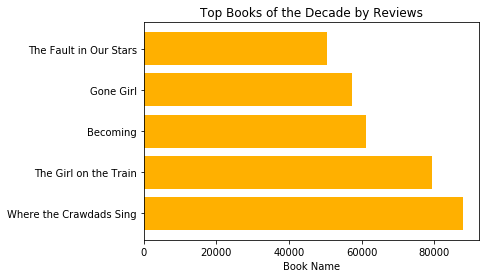

In [11]:
plt.barh(best_reviewed.head(10)['Name'], best_reviewed.head(10)['Reviews'], color = '#FFB000')
plt.title('Top Books of the Decade by Reviews')
plt.xlabel('Book Name')

### 2. The percentage of fiction to non-fiction

240
310


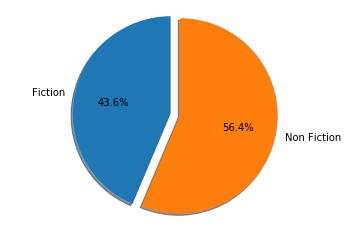

In [12]:
labels = 'Fiction', 'Non Fiction'
fiction_size = 0
non_fiction_size = 0
for i in data['Genre']:
    if i == 'Fiction':
        fiction_size += 1
    else:
        non_fiction_size +=1
print(fiction_size)
print(non_fiction_size)
sizes = [(fiction_size / len(data)) * 100, (non_fiction_size / len(data)) * 100]
explode = (0.1, 0)  # only "explode" the 1st slice (i.e. 'default')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 3. Trends over the years.

##### Total Number of books sold in each year.

In [13]:
data['Year'].value_counts()

2019    50
2018    50
2017    50
2016    50
2015    50
2014    50
2013    50
2012    50
2011    50
2010    50
2009    50
Name: Year, dtype: int64

50 books are sold every year across the decade.

##### Number of Books by Genre across the years.

In [14]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

for year in years:
    print(year)
    print(data['Genre'][data['Year'] == year].value_counts())

2009
Non Fiction    26
Fiction        24
Name: Genre, dtype: int64
2010
Non Fiction    30
Fiction        20
Name: Genre, dtype: int64
2011
Non Fiction    29
Fiction        21
Name: Genre, dtype: int64
2012
Non Fiction    29
Fiction        21
Name: Genre, dtype: int64
2013
Non Fiction    26
Fiction        24
Name: Genre, dtype: int64
2014
Fiction        29
Non Fiction    21
Name: Genre, dtype: int64
2015
Non Fiction    33
Fiction        17
Name: Genre, dtype: int64
2016
Non Fiction    31
Fiction        19
Name: Genre, dtype: int64
2017
Non Fiction    26
Fiction        24
Name: Genre, dtype: int64
2018
Non Fiction    29
Fiction        21
Name: Genre, dtype: int64
2019
Non Fiction    30
Fiction        20
Name: Genre, dtype: int64


##### Total Number of books sold by each Author across the decade.

In [15]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

for year in years:
    print(year)
    print(data['Author'][data['Year'] == year].value_counts())

2009
Stephenie Meyer                       6
Glenn Beck                            2
David Zinczenko                       2
Malcolm Gladwell                      2
Stieg Larsson                         2
Jeff Kinney                           2
Charlaine Harris                      2
Patrick Lencioni                      1
Maurice Sendak                        1
American Psychological Association    1
Kathryn Stockett                      1
Muriel Barbery                        1
Gallup                                1
Sarah Palin                           1
Jim Collins                           1
Elizabeth Strout                      1
Edward M. Kennedy                     1
Alan Moore                            1
Greg Mortenson                        1
Dan Brown                             1
Audrey Niffenegger                    1
Julia Child                           1
Mitch Albom                           1
Stephen Kendrick                      1
Mary Ann Shaffer                   

From the output, we can see the Author with the most number of books sold at the very top for each year.

##### Number of  Authors whose books sold across the decade.

In [16]:
Authors = []
for author in data['Author']:
    if author not in Authors:
        Authors.append(author)
print(Authors[:10])
print()
print("Total number of Authors across the decade is", len(Authors))

['JJ Smith', 'Stephen King', 'Jordan B. Peterson', 'George Orwell', 'National Geographic Kids', 'George R. R. Martin', 'Amor Towles', 'James Comey', 'Fredrik Backman', 'Larry Schweikart']

Total number of Authors across the decade is 248


##### Number of Distinct or Unique Books sold across the decade.

In [17]:
Books = []
for book in data['Name']:
    if book not in Books:
        Books.append(book)
print(Books[:10])
print()
print("Total number of Books across the decade is", len(Books))

['10-Day Green Smoothie Cleanse', '11/22/63: A Novel', '12 Rules for Life: An Antidote to Chaos', '1984 (Signet Classics)', '5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 'A Dance with Dragons (A Song of Ice and Fire)', 'A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons', 'A Gentleman in Moscow: A Novel', 'A Higher Loyalty: Truth, Lies, and Leadership', 'A Man Called Ove: A Novel']

Total number of Books across the decade is 351


### 4. Top 10 Authors according to reviews.

In [18]:
auth_reviews = data.sort_values(by = ['Reviews'], ascending = False)
auth_reviews.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction


In [19]:
x = auth_reviews.head(20)

Text(0.5, 0, 'AUTHOR')

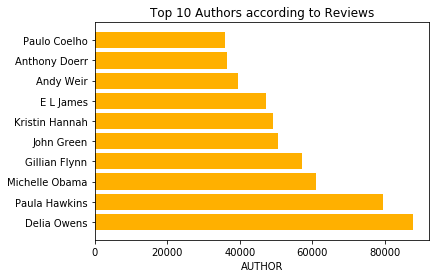

In [20]:
plt.barh(x['Author'], x['Reviews'], color = '#FFB000')
plt.title('Top 10 Authors according to Reviews')
plt.xlabel('AUTHOR')

### Corellation between Reviews and User Rating

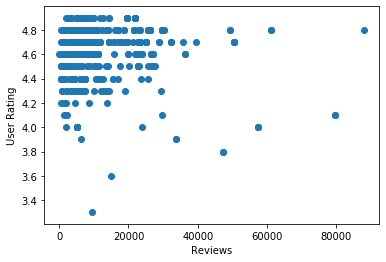

In [21]:
plt.scatter(data['Reviews'], data['User Rating'])
plt.xlabel('Reviews')
plt.ylabel('User Rating')
plt.show()

From the above scatter plot, it can be inferred that higher user ratings does not necessarily imply more reviews.